<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Magnetics
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

## Magnetic monopole

We define a **magnetic monopole** with pole strength $p$ [Am], located in depth $z=D$ [m].
The distance monopole to observer is given as $d$ [m].
$$
\begin{array}{rcl}
 B_z &=& {{\mu_0}\over{4\pi}} p {{z}\over{r^3}} \\
 B_x &=& {{\mu_0}\over{4\pi}} p {{x}\over{r^3}} \\
 d   &=& \sqrt{x^2+z^2}
\end{array}
$$
<img src="images/sketch_monopole.jpg" style=width:10cm;>
The pole strength $p$ [Am] is derived as product of magnetisation $M$ [A/m] and surface area $S$ [m$^2$]:
$$
p = M S
$$
The magnetisation $M$ [A/m] is defined as
$$
M = \frac{\chi T_0}{\mu_0}
$$
with 
- **susceptibility** $\chi$ [-],
- **field strength** $T_0$ [nT], and 
- **permeability of vacuum** $\mu_0$ [Vs/(Am)]
The surface $S$ [m$^2$] of a sphere is
$$
S = \pi R^2
$$
with $R$ [m] the radius.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

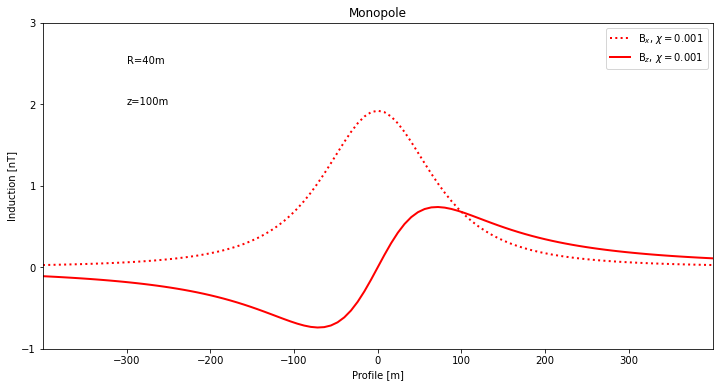

In [2]:
# define parameter values
G    = 6.672e-11      # m^3/kg/s^2
mu0  = 4.e-7*np.pi    # Vs/Am
T0   = 48000.e-9      # T

def mag_monopole(x,z=100.,R=40.,sus=0.001):
    # magnetic monopole of point source
    M  = sus*T0/mu0     # Magnetisation [A/m]
    p  = M*np.pi*R**2   # monopole moment [Am]
    r  = np.sqrt(x**2 + z**2)
    bx = mu0/(4.*np.pi) * p * z / r**3
    bz = mu0/(4.*np.pi) * p * x / r**3
    return bx,bz

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)
# run model
[bx1,bz1] = mag_monopole(x)
[bx2,bz2] = mag_monopole(x,sus=0.0005)
[bx3,bz3] = mag_monopole(x,sus=0.0001)

# plot magnetic induction components
plt.figure(figsize=(12.0, 6.0))
plt.title('Monopole')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([-1.0,3.0])
plt.yticks([y for y in np.linspace(-1,3,5)])
plt.ylabel('Induction [nT]')
plt.text(-300,2.50,'R=40m')
plt.text(-300,2.00,'z=100m')
plt.plot(x,1.e9*bx1,linewidth=2.0,linestyle=':',color='red',label='B$_x$, $\chi=0.001$')
plt.plot(x,1.e9*bz1,linewidth=2.0,linestyle='-',color='red',label='B$_z$, $\chi=0.001$')
#plt.plot(x,1.e9*bx2,linewidth=2.0,linestyle=':',color='green',label='B$_x$, $\chi=0.0005$')
#plt.plot(x,1.e9*bz2,linewidth=2.0,linestyle='-',color='green',label='B$_z$, $\chi=0.0005$')
#plt.plot(x,1.e9*bx3,linewidth=2.0,linestyle=':',color='blue',label='B$_x$, $\chi=0.0001$')
#plt.plot(x,1.e9*bz3,linewidth=2.0,linestyle='-',color='blue',label='B$_z$, $\chi=0.0001$')
plt.legend()

----
## Magnetic dipole

We define a **magnetic dipole** with pole strength $p$ [Am], 
distance between the two poles $L$ [m],
orientation with respect to horizontal $\alpha$ [${}^{\circ}$],
located in depth $z=D$ [m].
The distance monopole to observer is given as $d$ [m].
$$
\begin{array}{rcl}
 B_z &=& {{\mu_0}\over{4\pi}} p 
           \left( {{z}\over{r_1^3}} - {{z+L\sin\alpha}\over{r_2^3}}\right) \\
 B_x &=& {{\mu_0}\over{4\pi}} p 
           \left( {{x}\over{r_1^3}} - {{x+L\cos\alpha}\over{r_2^3}}\right) \\
 r_1 &=& \sqrt{x^2+z^2} \\
 r_2 &=& \sqrt{(x+L\cos\alpha)^2 + (z+L\sin\alpha)^2}
\end{array}
$$
<img src="images/sketch_dipole.jpg" style=width:10cm;>
The pole strength $p$ is derived from a **susceptibility** $\chi$ [-],
a field strneght $T_0$ [nT], and the surface of the monopole $S=\pi R^2$, with $R$ [m] the radius:
$$
P = \chi T_0 \pi R^2
$$





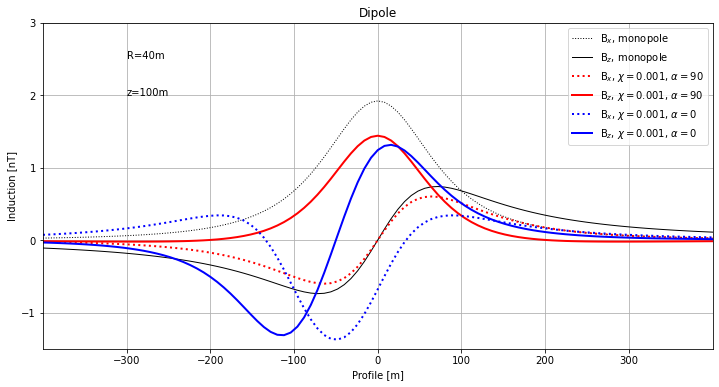

In [3]:
# define parameter values
G    = 6.672e-11      # m^3/kg/s^2
mu0  = 4.e-7*np.pi    # Vs/Am
T0   = 48000.e-9      # nT

def mag_dipole(x,z=100.,R=40.,L=100.,alpha=90.,sus=0.001):
    # magnetic dipole of two point sources with distant l
    d2r = np.pi/180.
    M   = sus*T0/mu0     # Magnetisation [A/m]
    p   = M*np.pi*R**2   # monopole moment [Am]
    d1  = np.sqrt(x**2 + z**2)
    d2  = np.sqrt((x+L*np.cos(alpha*d2r))**2 + (z+L*np.sin(alpha*d2r))**2)
    bx  = mu0/(4.*np.pi) * p * (x / d1**3 - (x+L*np.cos(alpha*d2r))/d2**3)
    bz  = mu0/(4.*np.pi) * p * (z / d1**3 - (z+L*np.sin(alpha*d2r))/d2**3)
    return bx,bz

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)
# run model
[bxm,bzm] = mag_monopole(x)
[bx1,bz1] = mag_dipole(x)
[bx2,bz2] = mag_dipole(x,alpha=45)
[bx3,bz3] = mag_dipole(x,alpha=0)

# plot magnetic induction components
plt.figure(figsize=(12.0, 6.0))
plt.title('Dipole')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([-1.5,3.0])
plt.yticks([y for y in np.linspace(-1,3,5)])
plt.ylabel('Induction [nT]')
plt.text(-300,2.50,'R=40m')
plt.text(-300,2.00,'z=100m')
plt.grid(b=True)
plt.plot(x,1.e9*bxm,linewidth=1.0,linestyle=':',color='black',label='B$_x$, monopole')
plt.plot(x,1.e9*bzm,linewidth=1.0,linestyle='-',color='black',label='B$_z$, monopole')
plt.plot(x,1.e9*bx1,linewidth=2.0,linestyle=':',color='red',label='B$_x$, $\chi=0.001$, $\\alpha=90$')
plt.plot(x,1.e9*bz1,linewidth=2.0,linestyle='-',color='red',label='B$_z$, $\chi=0.001$, $\\alpha=90$')
#plt.plot(x,1.e9*bx2,linewidth=2.0,linestyle=':',color='green',label='B$_x$, $\chi=0.001$, $\\alpha=45$')
#plt.plot(x,1.e9*bz2,linewidth=2.0,linestyle='-',color='green',label='B$_z$, $\chi=0.001$, $\\alpha=45$')
plt.plot(x,1.e9*bx3,linewidth=2.0,linestyle=':',color='blue',label='B$_x$, $\chi=0.001$, $\\alpha=0$')
plt.plot(x,1.e9*bz3,linewidth=2.0,linestyle='-',color='blue',label='B$_z$, $\chi=0.001$, $\\alpha=0$')
plt.legend()

----
## Sphere

For a homogeneously magnetised sphere with radius $R$ [m] and depth of center of sphere $D$ [m],
the total-field anomaly $T$ [T] is:
$$
T = \frac{\mu_0}{4\pi} M V \frac{3D^2\sin^2I + 3x^2\cos^2I\cos^2\alpha - 3 x D \sin^2I \cos\alpha -x^2 -D^2}{(x^2+D^2)^{5/2}}
$$

$$
\begin{array}{rcl}
M &=& \frac{\chi T_0}{\mu_0} \\
V &=& {{4}\over{3}} \pi R^3 \\
\end{array}
$$
Here,
- $I$ is the inclination of the magnetic field, and
- $\alpha$ the angle of the profile relative to magnetic north.

In [17]:
# define parameter values
G    = 6.672e-11      # m^3/kg/s^2
mu0  = 4.e-7*np.pi    # Vs/Am
T0   = 48000.e-9      # nT

def mag_sphere(x,D=100.,R=30.,sus=0.001,I=-67.,alpha=0.):
    """
    Total-field anomaly for homogeneously magnetised sphere
    from: Lindner & Scheibe, 1978, Die Berechnung von Deltag - und DeltaT-Anomalien für
    regelmäßige homogene Störkörper. Gerlands Beitr. Geophys., 87, 29-45.
    """
    # total field of a sphere
    d2r = np.pi/180.
    M   = sus*T0/mu0     # Magnetisation [A/m]
    V   = 4./ 3.*np.pi*R**3
    T   = mu0/(4.*np.pi) * M * V * (3*D**2*np.sin(I*d2r)**2 
                                    + 3*x**2*np.cos(I*d2r)**2*np.cos(alpha*d2r)**2
                                    - 3*x*D*np.sin(I*d2r)**2*np.cos(alpha*d2r)
                                    - x**2 - D**2) / (x**2+D**2)**(5/2)
    return T

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)
# run model
T1 = mag_sphere(x)
T2 = mag_sphere(x,I=-45)
T3 = mag_sphere(x,I=0)
T4 = mag_sphere(x,I=0,alpha=45)

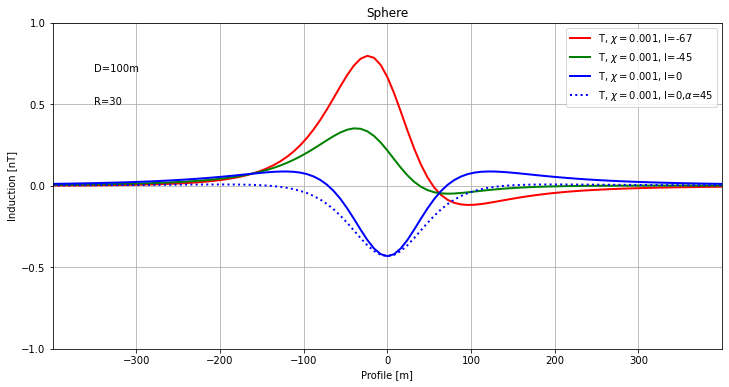

In [21]:
# plot magnetic induction components
plt.figure(figsize=(12.0, 6.0))
plt.title('Sphere')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([-1.0,1.0])
plt.yticks([y for y in np.linspace(-1,1,5)])
plt.ylabel('Induction [nT]')
plt.text(-350,.50,'R=30')
plt.text(-350,.70,'D=100m')
plt.grid(b=True)
plt.plot(x,1.e9*T1,linewidth=2.0,linestyle='-',color='red',label='T, $\chi=0.001$, I=-67')
plt.plot(x,1.e9*T2,linewidth=2.0,linestyle='-',color='green',label='T, $\chi=0.001$, I=-45')
plt.plot(x,1.e9*T3,linewidth=2.0,linestyle='-',color='blue',label='T, $\chi=0.001$, I=0')
plt.plot(x,1.e9*T4,linewidth=2.0,linestyle=':',color='blue',label='T, $\chi=0.001$, I=0,$\\alpha$=45')
plt.legend()

... done